In [56]:
%matplotlib inline

import pickle
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from pandas import read_csv

In [57]:
training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [58]:
sign_names = pd.read_csv("./signname.csv").values[:, 1]

#Separating features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [59]:
# Number of training examples
n_train = X_train.shape[0]
# Number of validation examples
n_validation = X_valid.shape[0]
# Number of testing examples.
n_test = X_test.shape[0]
# What's the shape of an traffic sign image?
image_shape = X_train[0].shape
# Unique classes/labels there are in the dataset.
classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


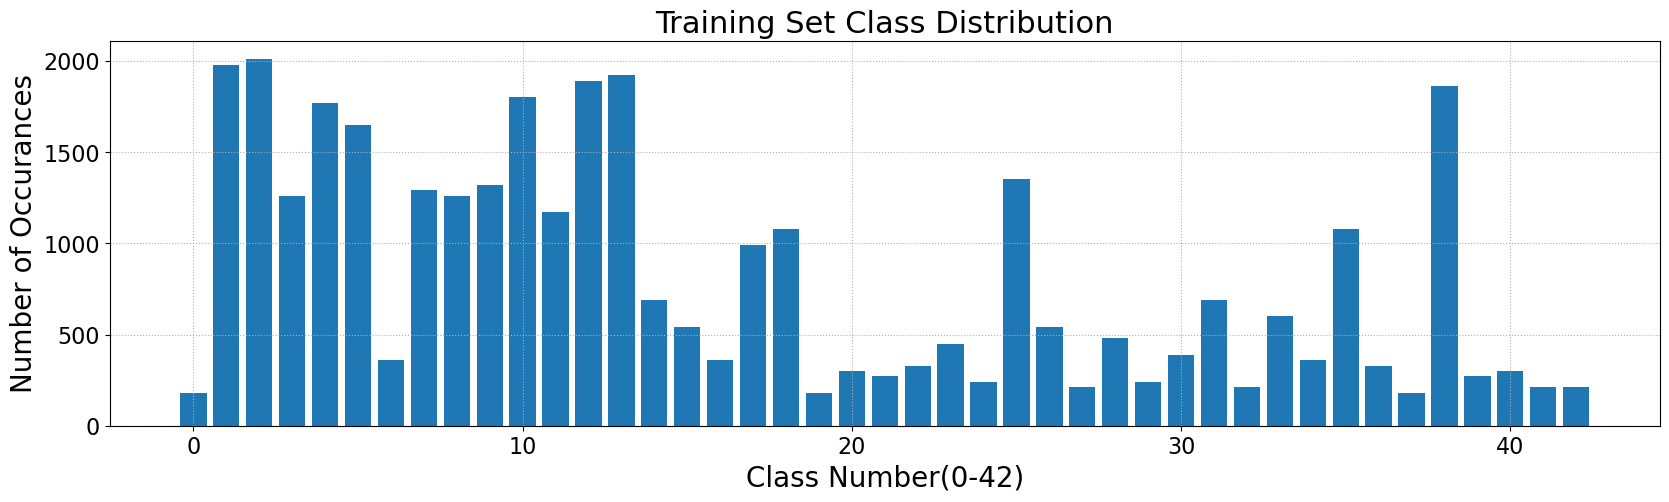

In [60]:
#Plot to show frequencies of data for Training dataset
plt.figure(0, figsize = (20,5))
unique_train, counts_train = np.unique(y_train, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

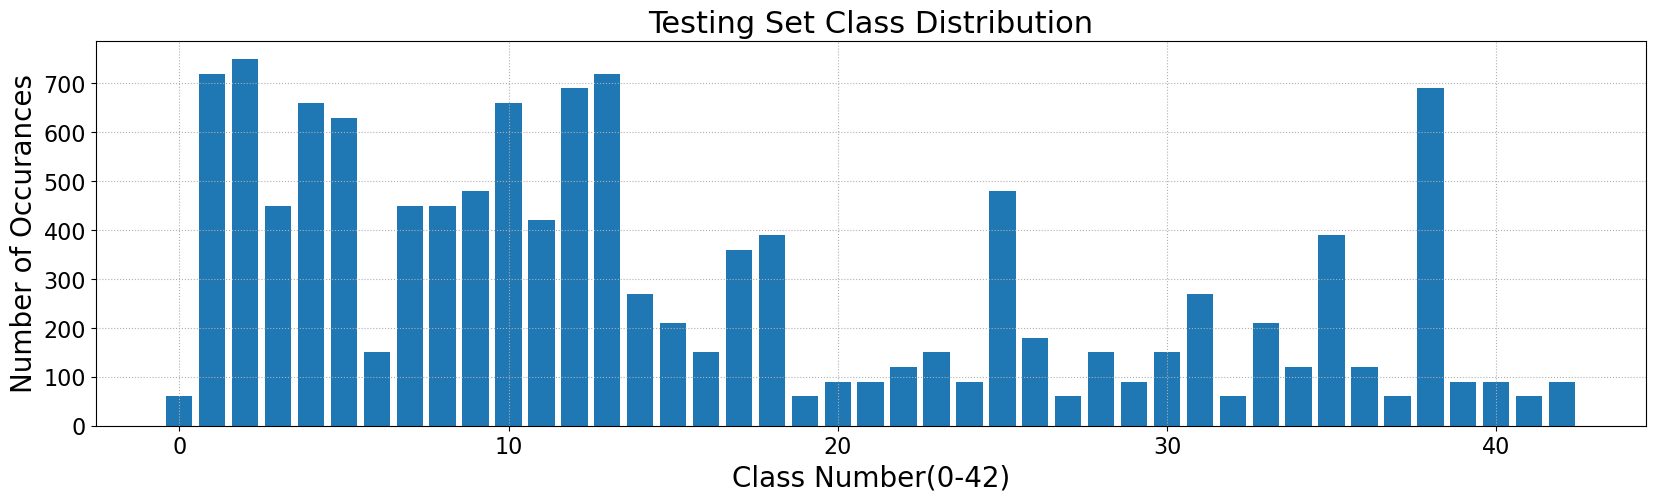

In [61]:
#Plot to show frequencies of data for Testing dataset
plt.figure(0, figsize = (20,5))
unique_test, counts_test = np.unique(y_test, return_counts = True)
plt.bar(unique_test, counts_test)

plt.title('Testing Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

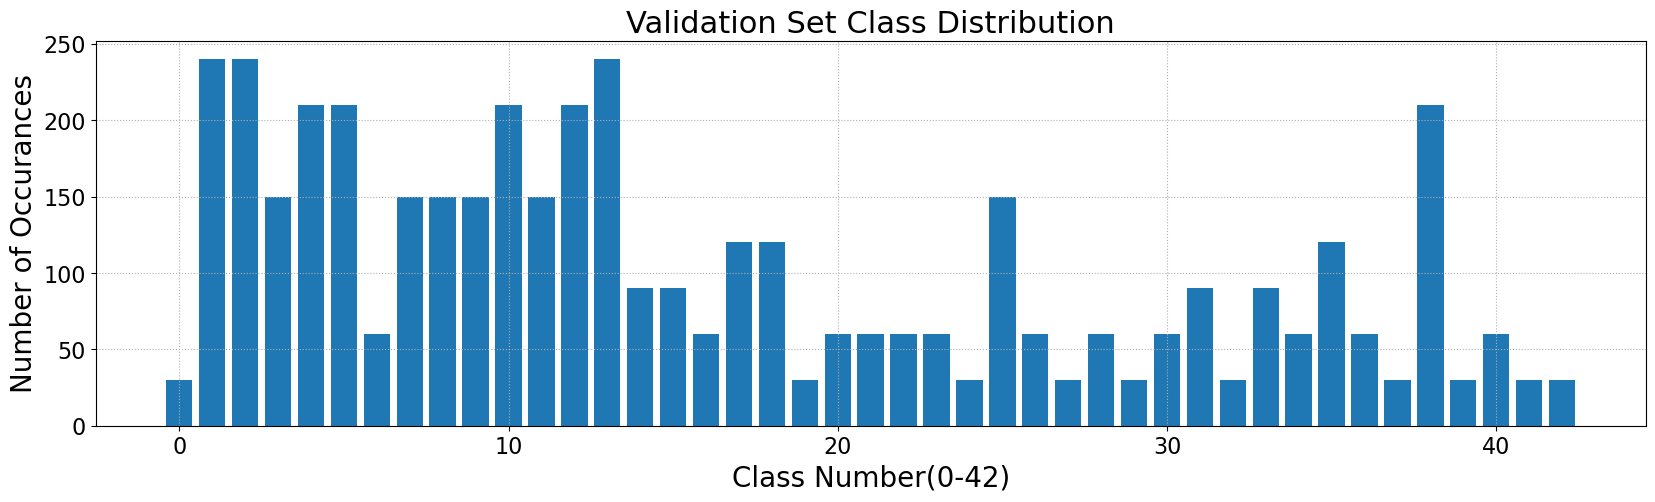

In [62]:
#Plot to show frequencies of data for Validation dataset
plt.figure(0, figsize = (20,5))
unique_valid, counts_valid = np.unique(y_valid, return_counts = True)
plt.bar(unique_valid, counts_valid)

plt.title('Validation Set Class Distribution', fontsize=22)
plt.xlabel('Class Number(0-42)', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')

0 . Class :  Speed limit (20km/h)


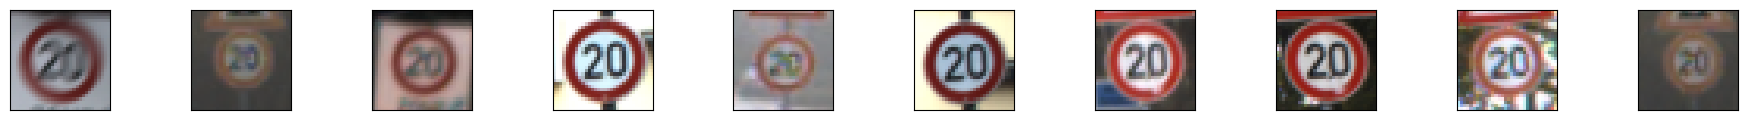

1 . Class :  Speed limit (30km/h)


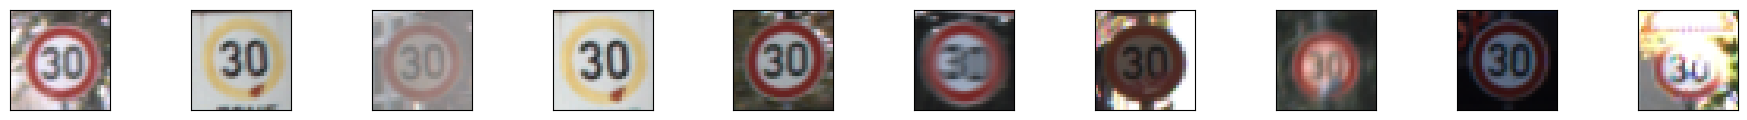

2 . Class :  Speed limit (50km/h)


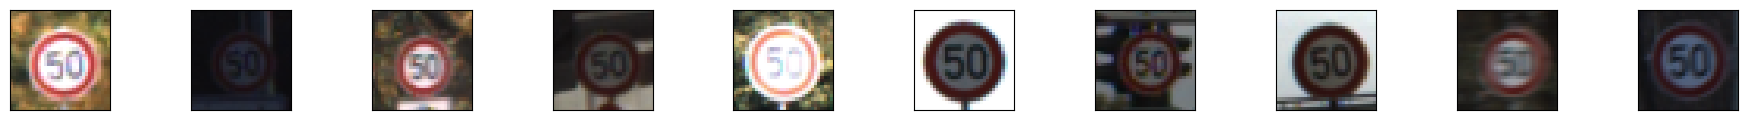

3 . Class :  Speed limit (60km/h)


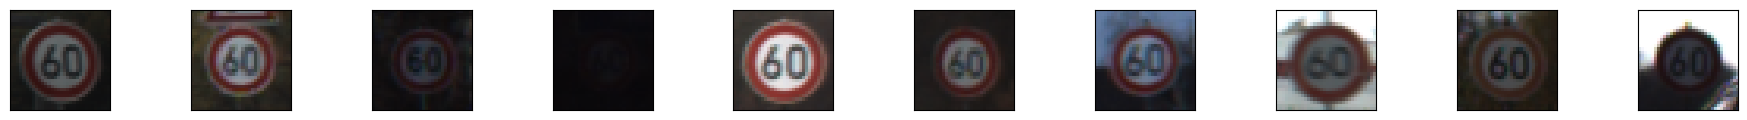

4 . Class :  Speed limit (70km/h)


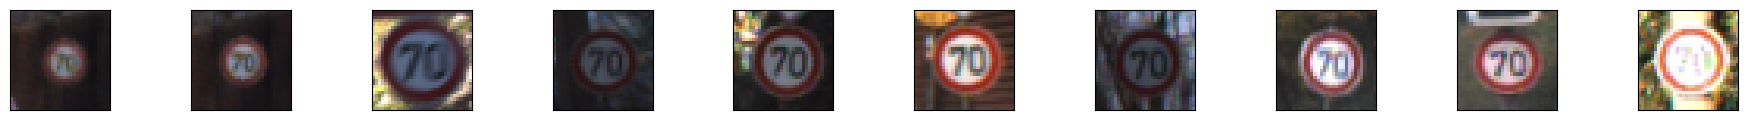

5 . Class :  Speed limit (80km/h)


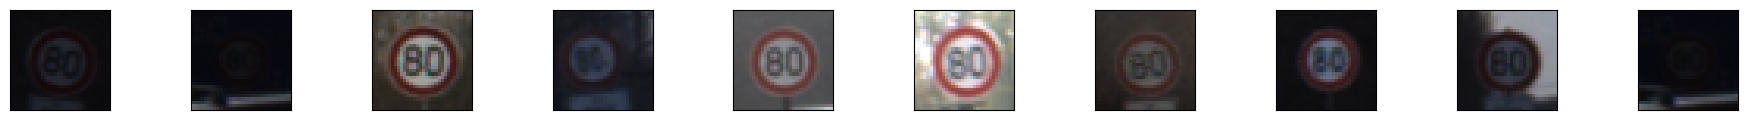

6 . Class :  End of speed limit (80km/h)


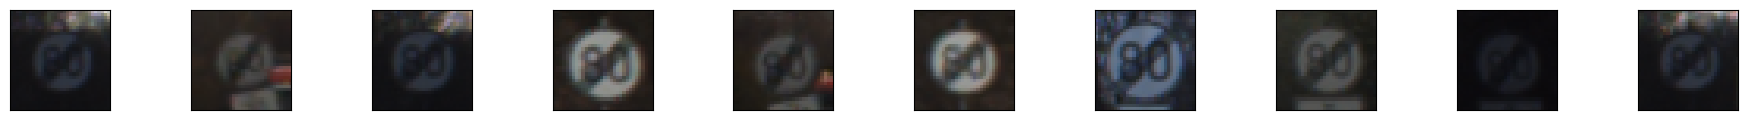

7 . Class :  Speed limit (100km/h)


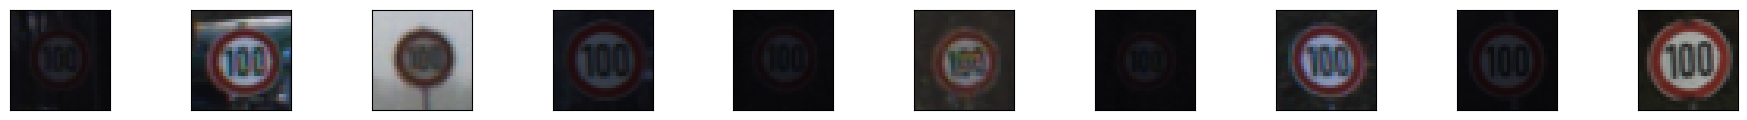

8 . Class :  Speed limit (120km/h)


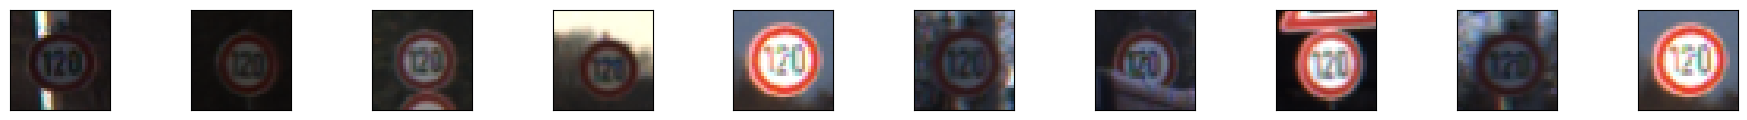

9 . Class :  No passing


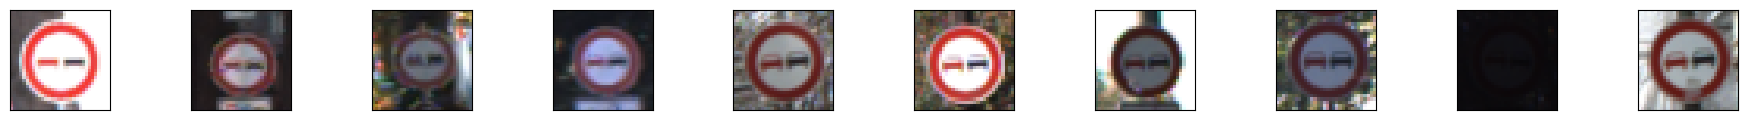

10 . Class :  No passing for vehicles over 3.5 metric tons


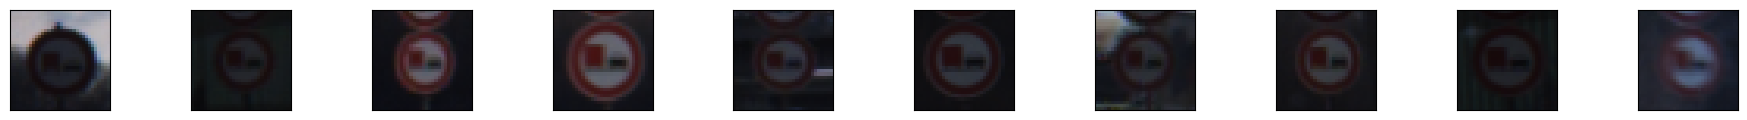

11 . Class :  Right-of-way at the next intersection


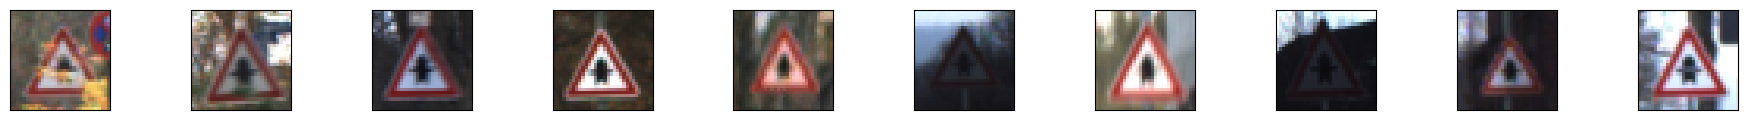

12 . Class :  Priority road


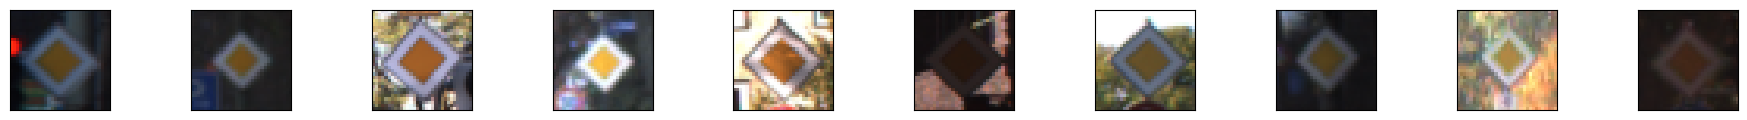

13 . Class :  Yield


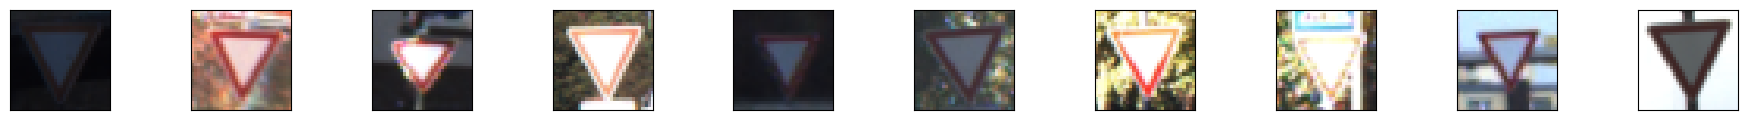

14 . Class :  Stop


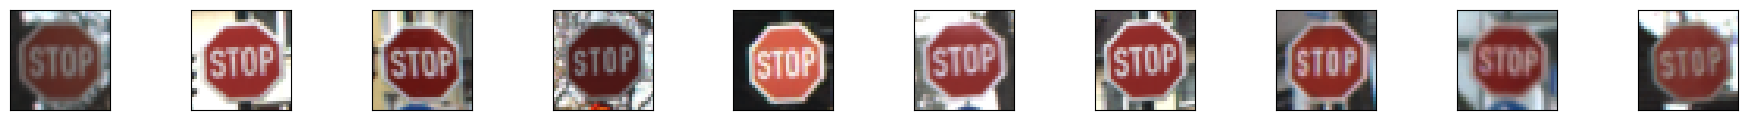

15 . Class :  No vehicles


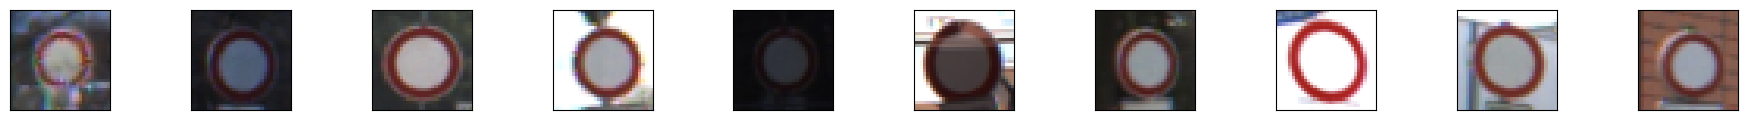

16 . Class :  Vehicles over 3.5 metric tons prohibited


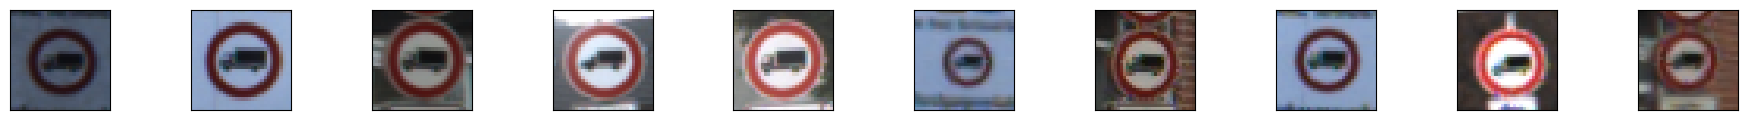

17 . Class :  No entry


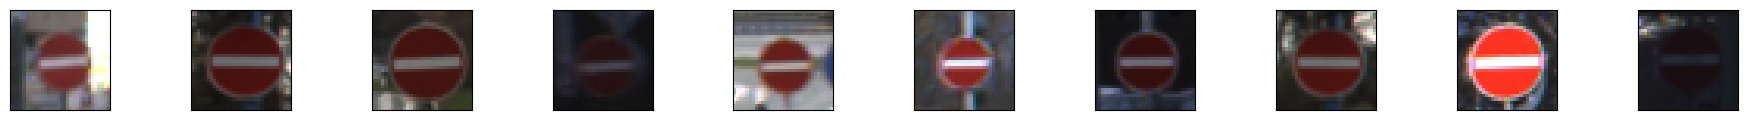

18 . Class :  General caution


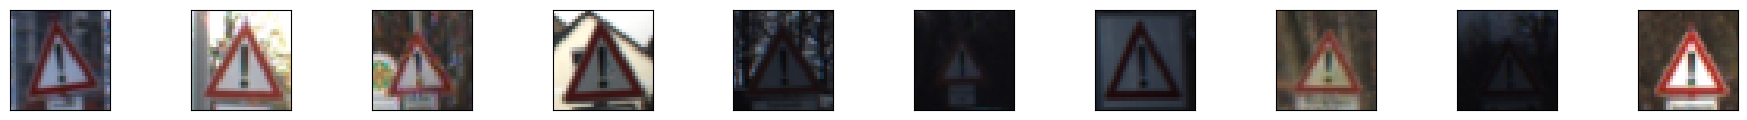

19 . Class :  Dangerous curve to the left


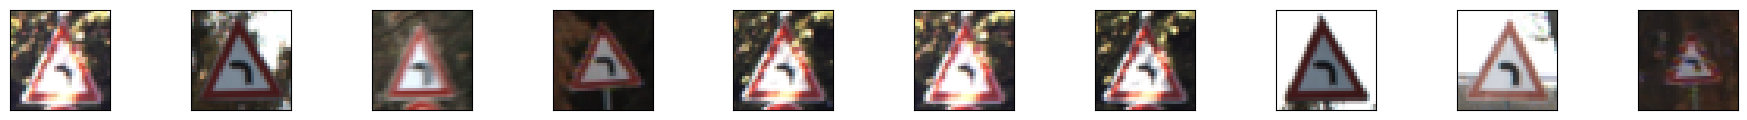

20 . Class :  Dangerous curve to the right


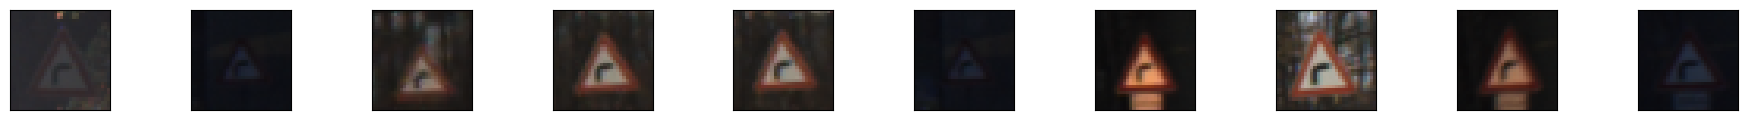

21 . Class :  Double curve


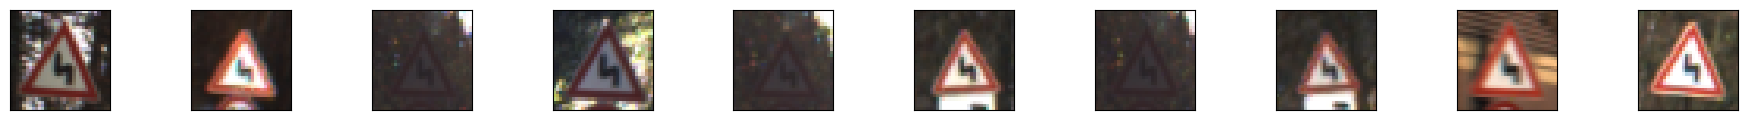

22 . Class :  Bumpy road


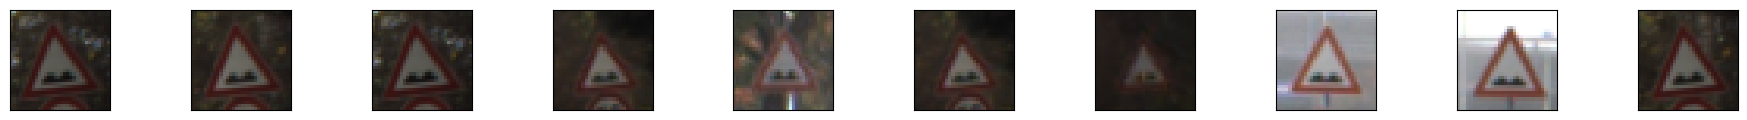

23 . Class :  Slippery road


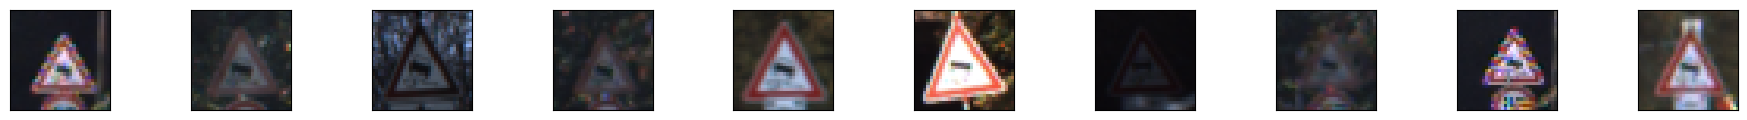

24 . Class :  Road narrows on the right


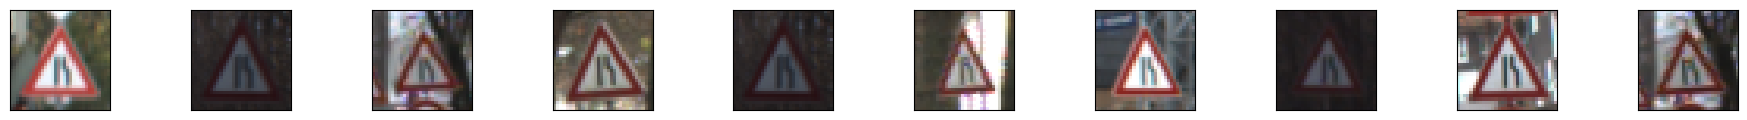

25 . Class :  Road work


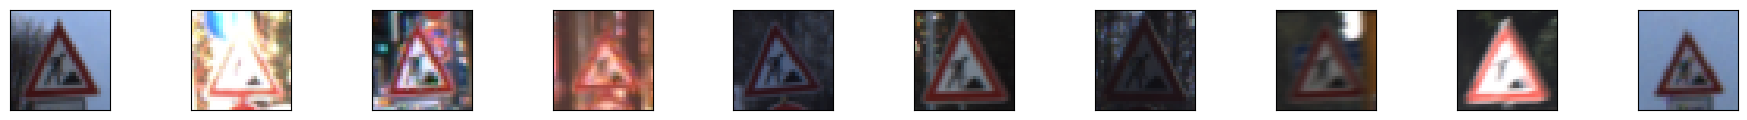

26 . Class :  Traffic signals


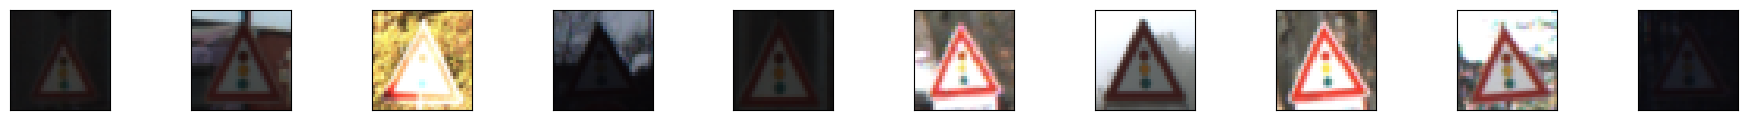

27 . Class :  Pedestrians


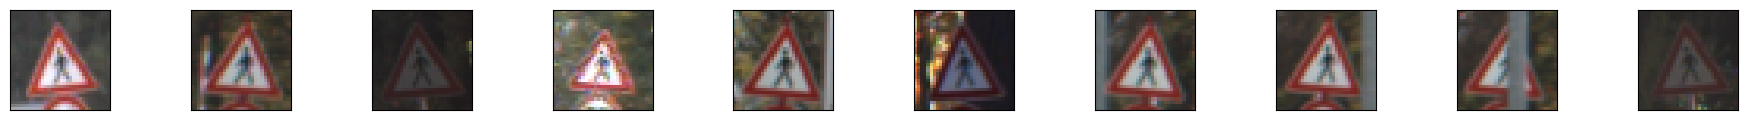

28 . Class :  Children crossing


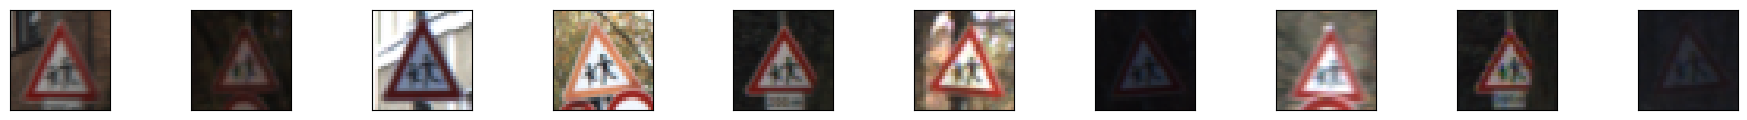

29 . Class :  Bicycles crossing


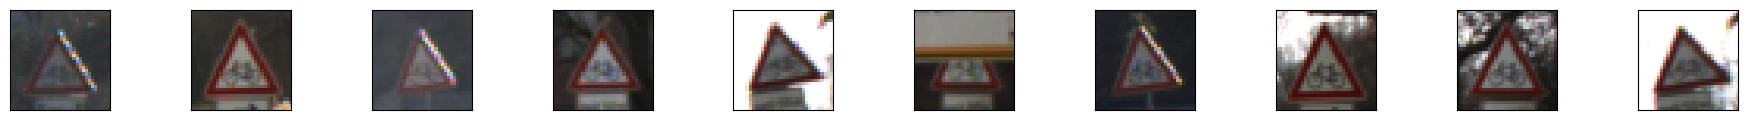

30 . Class :  Beware of ice/snow


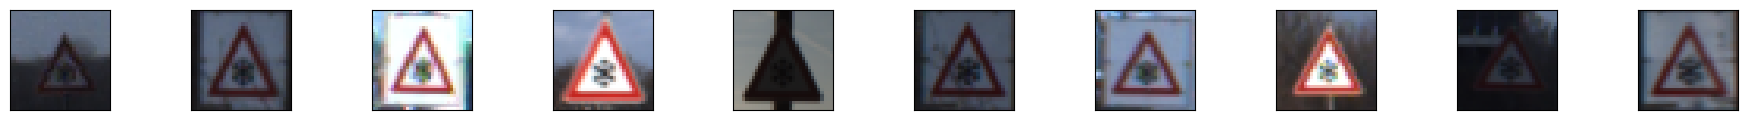

31 . Class :  Wild animals crossing


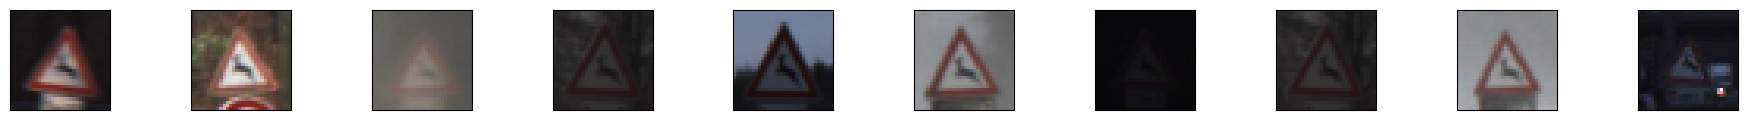

32 . Class :  End of all speed and passing limits


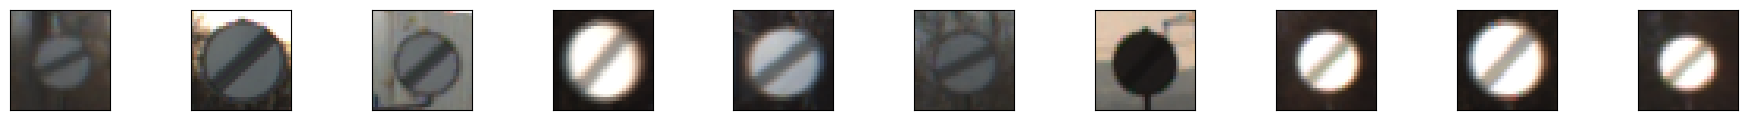

33 . Class :  Turn right ahead


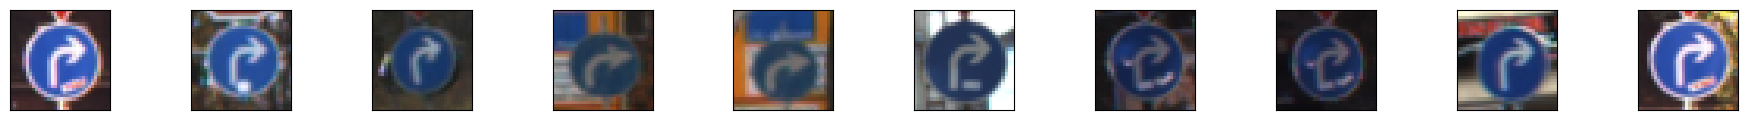

34 . Class :  Turn left ahead


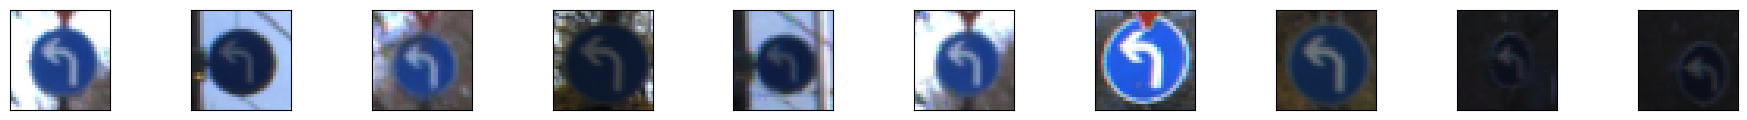

35 . Class :  Ahead only


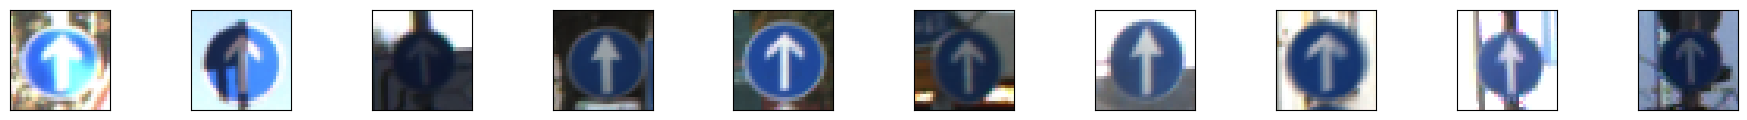

36 . Class :  Go straight or right


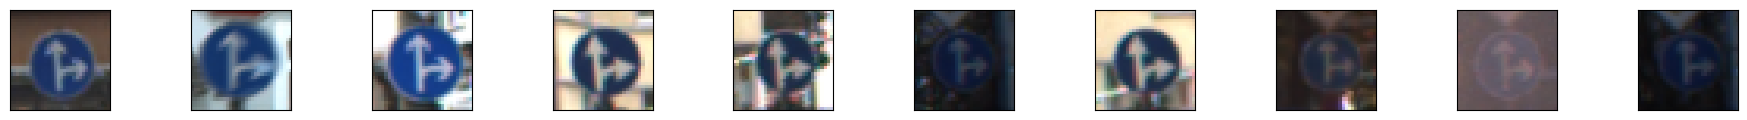

37 . Class :  Go straight or left


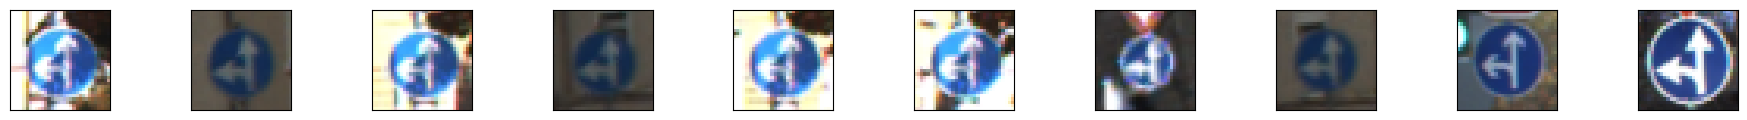

38 . Class :  Keep right


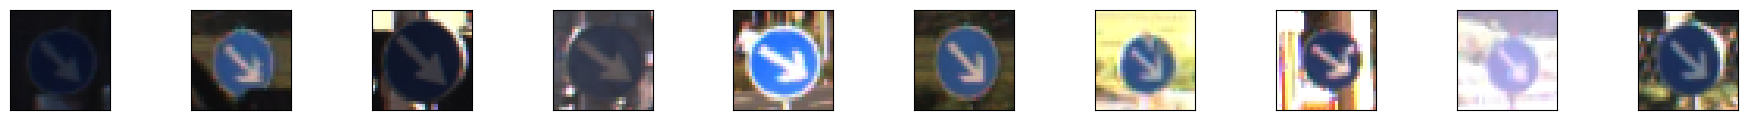

39 . Class :  Keep left


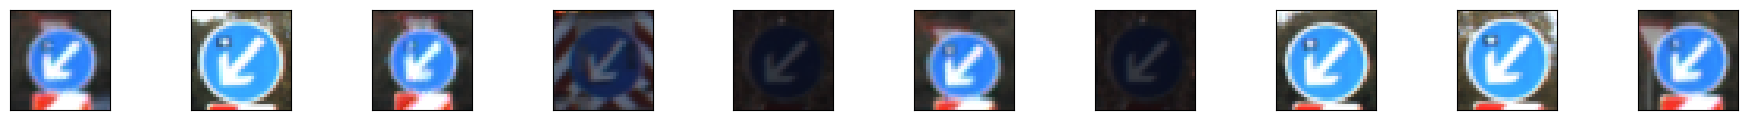

40 . Class :  Roundabout mandatory


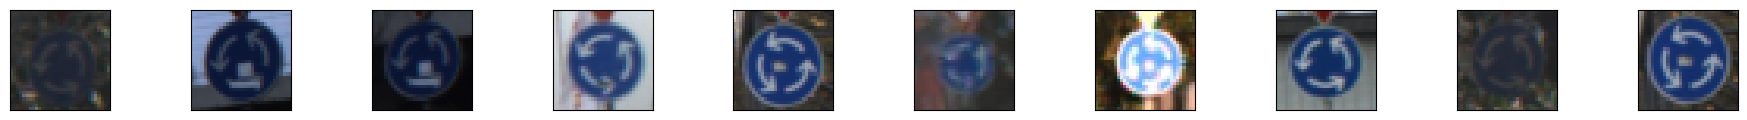

41 . Class :  End of no passing


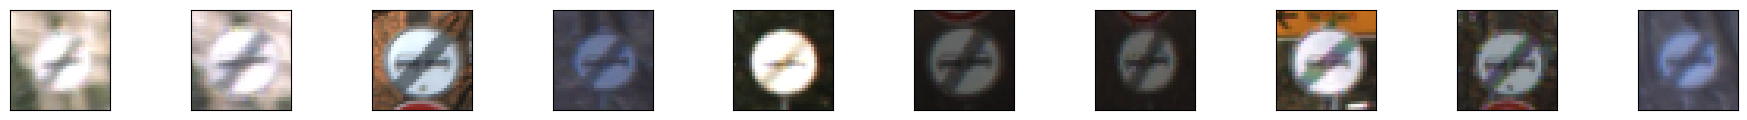

42 . Class :  End of no passing by vehicles over 3.5 metric


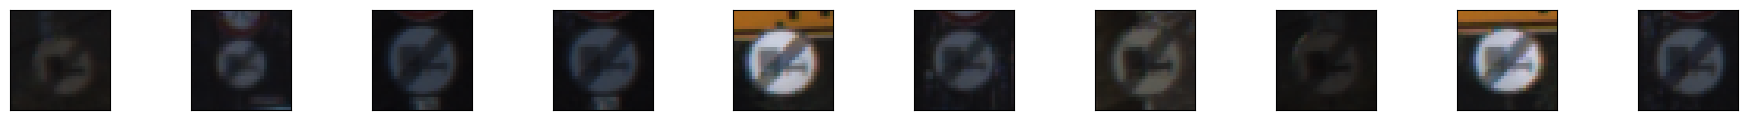

In [63]:
#Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c] )
    fig = pyplot.figure(figsize = (18, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i+c_count, 10)
        axis.imshow(X_train[random_indices[i],:,:,:])
        #axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)

    pyplot.show()

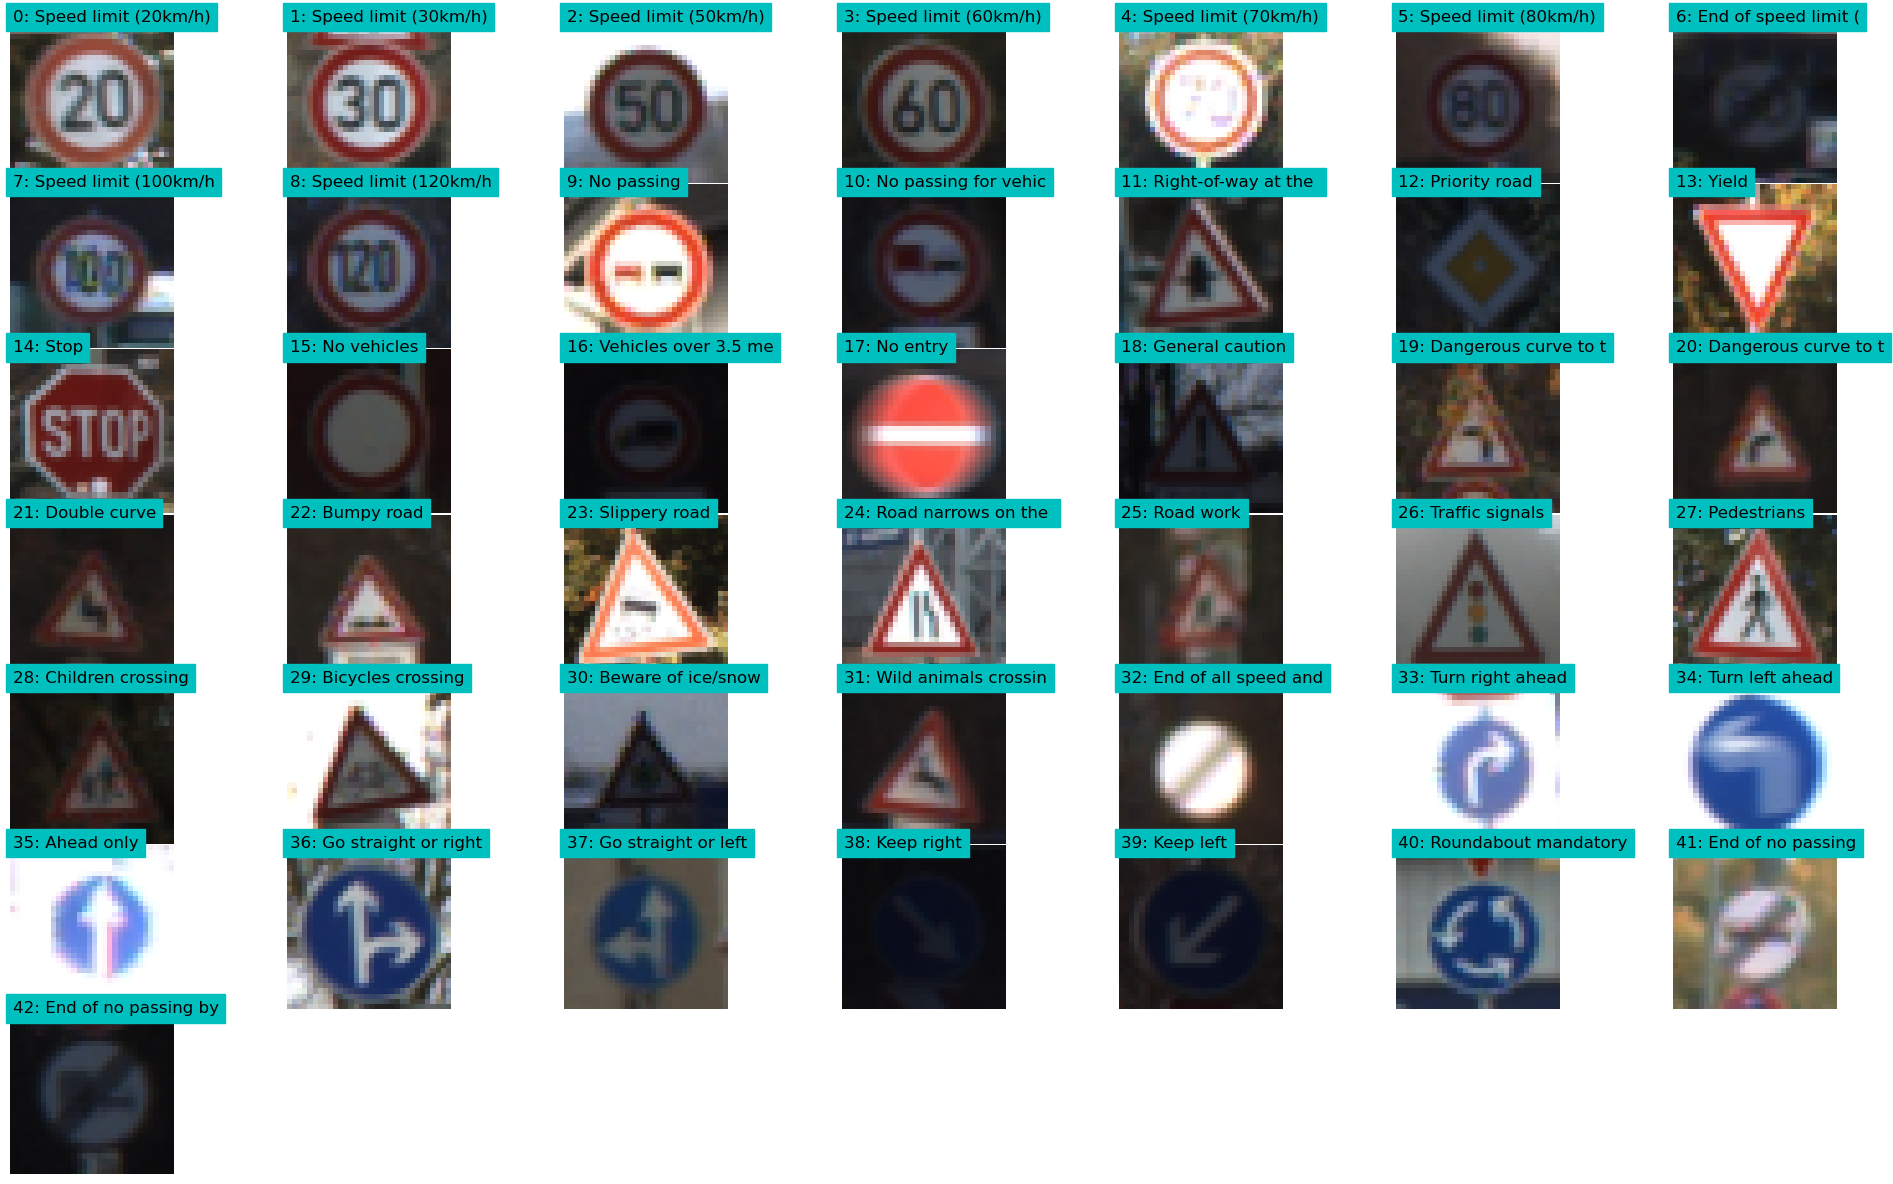

In [64]:
#Showing Random image datasets for each class
def plot_random_each_class(n_row,n_col,X,y):

    plt.figure(figsize = (25,15))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes.

    for c, c_i, c_count in zip(classes, class_indices, class_counts):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[c])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(c_i, c_i+c_count)
        plt.imshow(X[ind_plot])
        #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
        plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

        plt.axis('off')
    plt.show()

plot_random_each_class(7,7,X_train,y_train)

In [65]:
!pip install opencv-python

### DATA AUGMENTATION

In [66]:
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import cv2

def rotate_image(image, max_angle =15):
    rotate_out = rotate(image, np.random.uniform(-max_angle, max_angle), mode='edge')
    return rotate_out

def translate_image(image, max_trans = 5, height=32, width=32):
    translate_x = max_trans*np.random.uniform() - max_trans/2
    translate_y = max_trans*np.random.uniform() - max_trans/2
    translation_mat = np.float32([[1,0,translate_x],[0,1,translate_y]])
    trans = cv2.warpAffine(image, translation_mat, (height,width))
    return trans

def projection_transform(image, max_warp=0.8, height=32, width=32):
    #Warp Location
    d = height * 0.3 * np.random.uniform(0,max_warp)

    #Warp co-ordinates
    tl_top = np.random.uniform(-d, d)     # Top left corner, top margin
    tl_left = np.random.uniform(-d, d)    # Top left corner, left margin
    bl_bottom = np.random.uniform(-d, d)  # Bottom left corner, bottom margin
    bl_left = np.random.uniform(-d, d)    # Bottom left corner, left margin
    tr_top = np.random.uniform(-d, d)     # Top right corner, top margin
    tr_right = np.random.uniform(-d, d)   # Top right corner, right margin
    br_bottom = np.random.uniform(-d, d)  # Bottom right corner, bottom margin
    br_right = np.random.uniform(-d, d)   # Bottom right corner, right margin

    ##Apply Projection
    transform = ProjectiveTransform()
    transform.estimate(np.array((
                (tl_left, tl_top),
                (bl_left, height - bl_bottom),
                (height - br_right, height - br_bottom),
                (height - tr_right, tr_top)
            )), np.array((
                (0, 0),
                (0, height),
                (height, height),
                (height, 0)
            )))
    output_image = warp(image, transform, output_shape=(height, width), order = 1, mode = 'edge')
    return output_image

def transform_image(image, max_angle=15, max_trans =5 ,max_warp=0.8):
    ## Simple pipline to take an input image and apply a serise of simple
    ## Distortions to augment the training data set
    ## (note: this function will rescale pixel values between 0-1)
    ##
    height, width, channels = image.shape
    #Rotate Image
    rotated_image = rotate_image(image, max_angle)
    #Translate Image
    translated_image = translate_image(rotated_image, max_trans, height, width)
    #Project Image
    output_image = projection_transform(translated_image, max_warp, height, width)
    return (output_image*255.0).astype(np.uint8)

def augment_and_balance_data(X_train, y_train, no_examples_per_class =5000):

    n_examples = no_examples_per_class
    #Get paramters of data
    classes, class_indices, class_counts  = np.unique(y_train, return_index=True, return_counts=True)
    height, width, channels = X_train[0].shape


    #Create new data and labels for the balanced augmented data
    X_balance = np.empty([0, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
    y_balance = np.empty([0], dtype = y_train.dtype)

    for c, count in zip(range(n_classes), class_counts):
        ##Copy over the current data for the given class
        X_orig = X_train[y_train == c]
        y_orig = y_train[y_train == c]
        ##Add original data to the new dataset
        X_balance = np.append(X_balance, X_orig, axis=0)
        print(c,count)
        temp_X = np.empty([n_examples-count, X_train.shape[1], X_train.shape[2], X_train.shape[3]], dtype = np.float32)
        for i in range(n_examples - count):
            temp_X[i,:,:,:] = transform_image(X_orig[i%count]).reshape((1, height, width, channels))


        X_balance = np.append(X_balance,temp_X, axis=0)
        n_added_ex = X_balance.shape[0] - y_balance.shape[0]
        y_balance = np.append(y_balance, np.full(n_added_ex, c, dtype =int))

        return X_balance.astype(np.uint8), y_balance

c:\Users\Abhishek\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Data Augmentation by Rotation

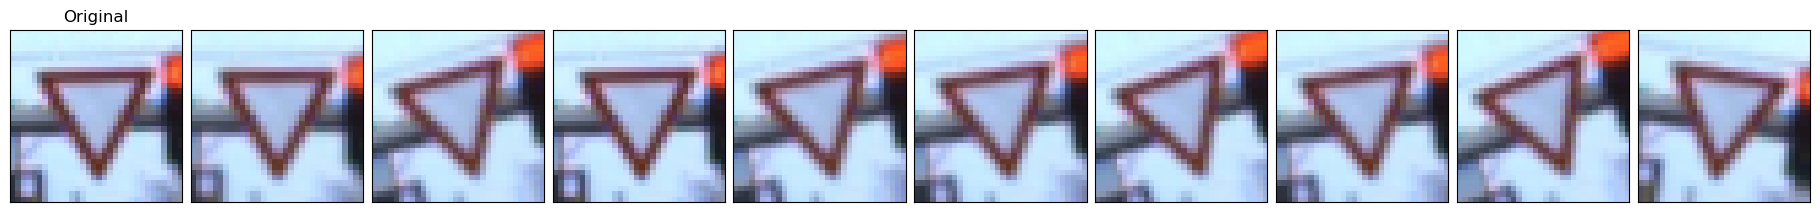

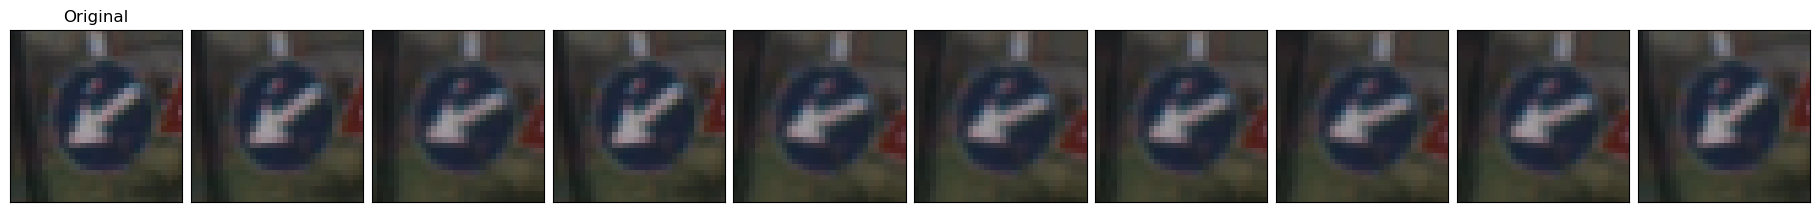

In [67]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(rotate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

Data Augmentation by Translation

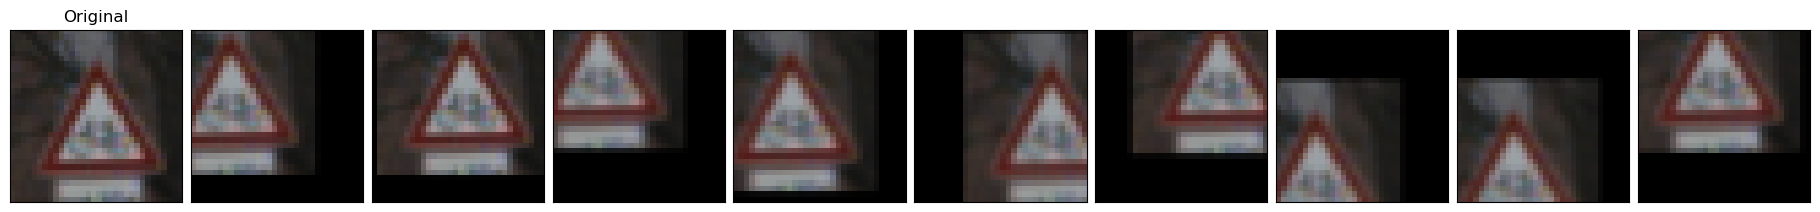

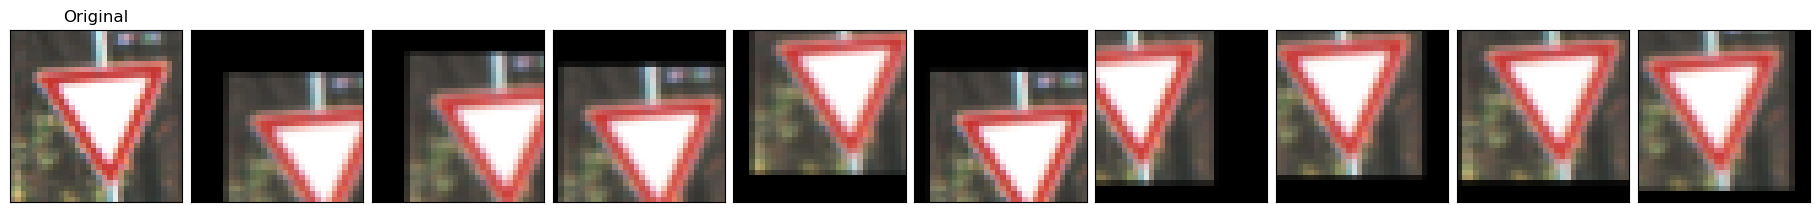

In [68]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(translate_image(X_train[image[j],:,:,:], 20))
    pyplot.show()

Data Augmentation by Homography Projection

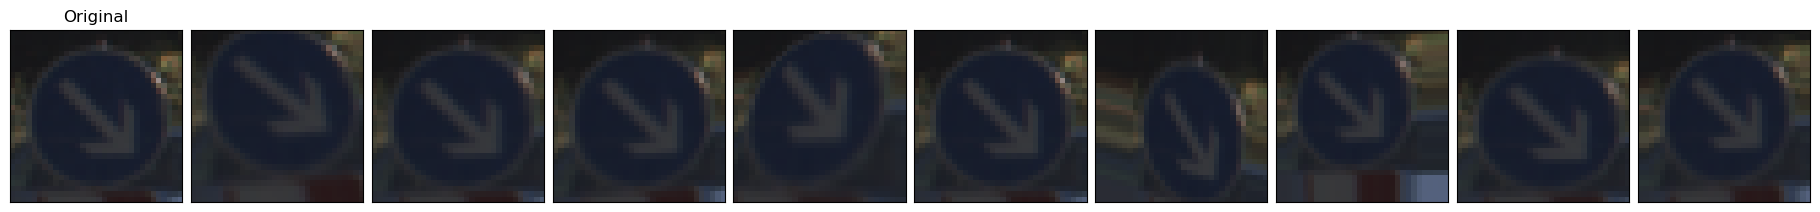

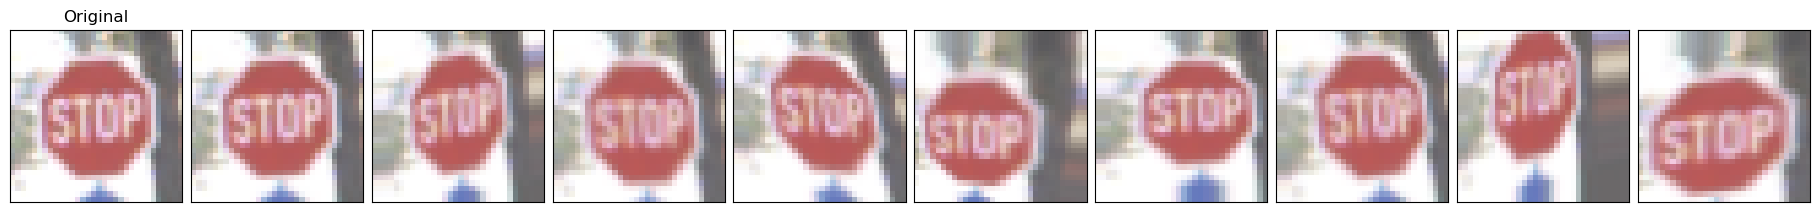

In [69]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(projection_transform(X_train[image[j],:,:,:]))
    pyplot.show()

Pipeline for Data Augmentation

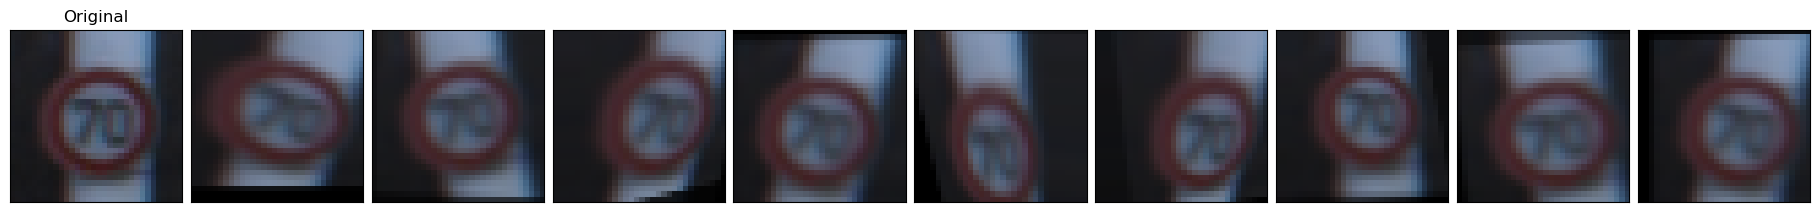

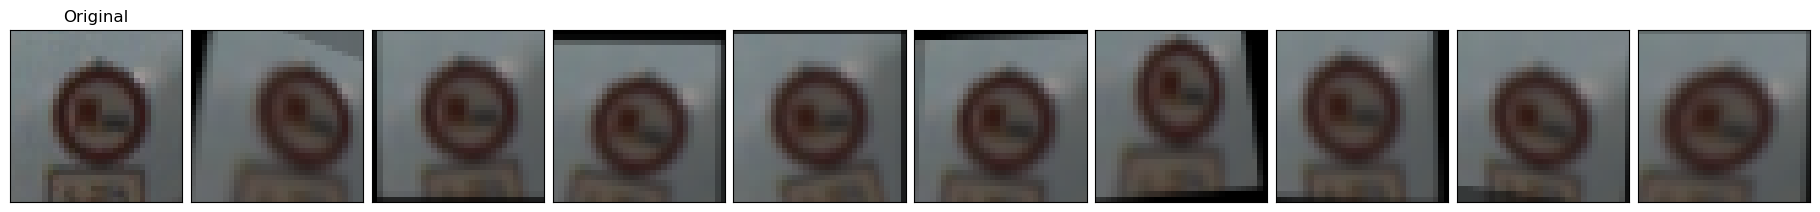

In [70]:
no_examples = 2
image = np.random.randint(0, n_train, no_examples)

for j in range(no_examples):
    fig = pyplot.figure(figsize = (18, 2))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        if i == 0:
            axis.imshow(X_train[image[j],:,:,:])
            axis.title.set_text('Original')
        else:
            axis.imshow(transform_image(X_train[image[j],:,:,:]))
    pyplot.show()

Generate or Load Augmented Dataset

In [71]:
####Only Run to generate Augmented data

#X_out, y_out = augment_and_balance_data(X_train, y_train, 5000)
#np.savez_compressed('Datasets/Augmented_Data/AugTrafficdata', X_train_aug = X_out, y_train_aug = y_out)

In [72]:
##Load augmented data

# loaded = np.load('Datasets/Augmented_Data/AugTrafficdata.npz')
# X_train_aug = loaded['X_train_aug']
# y_train_aug = loaded['y_train_aug']
# print("Augmented Dataset size X", X_train_aug.shape)
# print("Augmented Dataset size y", y_train_aug.shape)

In [73]:
!pip install tensorflow

Data Preprocessig

In [74]:
from sklearn.utils import shuffle

## Shuffle the dataset
X_train, y_train = shuffle(X_train, y_train)

In [75]:
# Convert RGB images to grayscale for the training set
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
# Convert RGB images to grayscale for the testing set
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
# Convert RGB images to grayscale for the validation set
X_validation_gray  = np.sum(X_valid/3, axis=3, keepdims=True)

In [76]:
# Normalize the training set of grayscale images
X_train_gray_norm = (X_train_gray - 32) / 32
# Normalize the test set of grayscale images
X_test_gray_norm = (X_test_gray - 32) / 32
# Normalize the validation set of grayscale images
X_validation_gray_norm = (X_validation_gray - 32) / 32

In [77]:
# Onehot Encoding the labels.
from tensorflow.keras.utils import to_categorical

# Store the original labels for future reference
y_train_unchanged = y_train
y_validation_unchanged = y_valid
y_test_unchanged = y_test

# Perform Onehot Encoding on the labels
# Convert the labels from integer representation to binary matrix representation
y_train = to_categorical(y_train)
y_validation = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [78]:
# Shape of Train dataset
X_train.shape
# Shape of Test dataset
X_test.shape
# Shape of Validation dataset
X_valid.shape

(4410, 32, 32, 3)

### AlexNet

In [79]:
# We will consider AlexNet convolutional neural network architectures for this challenge.
# AlexNet (2012)(CIFAR10 Style) : Classic architecture with additional Batch Normalisation layers to assist training

#1. Convolution layers are utilized to extract specific features from images by applying filters. These layers simultaneously learn multiple features from the input and utilize them for image classification.
#2. Pooling layers are employed to downsample feature maps and detect features effectively.
#3. BatchNormalization layers are used to normalize data, preventing overfitting in the model.
#4. The Flatten layer converts multi-dimensional input into a 1-dimensional format, enabling it to be fed into fully connected dense layers.
#5. Fully connected layers establish connections between all input and output neurons.
#6. Stride is a parameter in convolutional neural networks that determines the amount of movement over images or video data during filtering.
#7. Padding in convolutional neural networks refers to the additional pixels added to an image when processed by the kernel, aiding the operations of a CNN.

In [80]:
# Define the architecture of AlexNet
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np

np.random.seed(1000)

# Create a Sequential model
AlexNet = Sequential()

# Add the 1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
# Add the 2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Add the 3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

# Add the 4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add the 5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

# Flatten the input
AlexNet.add(Flatten())

# Add the 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,1,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))
# Add the 2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(Dropout(0.4))

# Add the Output layer
AlexNet.add(Dense(43))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

# Print the model summary
AlexNet.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 8, 8, 96)          11712     
                                                                 
 batch_normalization_12 (Ba  (None, 8, 8, 96)          384       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 4, 4, 96)          0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_13 (Ba  (None, 4, 4, 256)        

In [81]:
# Compile the AlexNet model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
AlexNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the AlexNet model on the training data, for a total of 20 epochs, with validation data for monitoring performance
# X_train_gray_norm and y_train represent the preprocessed and normalized training data
# X_validation_gray_norm and y_validation represent the preprocessed and normalized validation data
history = AlexNet.fit(X_train_gray_norm, y_train, epochs=50, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/50


1088/1088 [==============================] - 157s 137ms/step - loss: 2.5397 - accuracy: 0.3587 - val_loss: 2.8643 - val_accuracy: 0.3356
Epoch 2/50
1088/1088 [==============================] - 139s 128ms/step - loss: 1.2305 - accuracy: 0.7012 - val_loss: 1.3027 - val_accuracy: 0.6481
Epoch 3/50
1088/1088 [==============================] - 134s 123ms/step - loss: 0.8061 - accuracy: 0.8129 - val_loss: 1.4335 - val_accuracy: 0.6399
Epoch 4/50
1088/1088 [==============================] - 137s 126ms/step - loss: 0.5960 - accuracy: 0.8626 - val_loss: 0.9722 - val_accuracy: 0.7399
Epoch 5/50
1088/1088 [==============================] - 137s 126ms/step - loss: 0.4521 - accuracy: 0.8997 - val_loss: 1.0240 - val_accuracy: 0.7297
Epoch 6/50
1088/1088 [==============================] - 138s 127ms/step - loss: 0.3687 - accuracy: 0.9191 - val_loss: 1.0260 - val_accuracy: 0.7395
Epoch 7/50
1088/1088 [==============================] - 131s 120ms/step - loss: 0.3096 - accuracy: 0.9337 - va

In [82]:
import tensorflow as tf

# Save the model
AlexNet.save("Best_AlexNet.h5")

#Loading Saved model
New_model1 = tf.keras.models.load_model('Best_AlexNet.h5')

c:\Users\Abhishek\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model 1 Evaluation & Report

In [83]:
New_model1.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 13s 31ms/step - loss: 0.6058 - accuracy: 0.8666


[0.6058325171470642, 0.8665875196456909]

In [84]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = New_model1.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 1 (AlexNet):")
print(classification_rep)

395/395 [==============================] - 13s 32ms/step

Classification Report for Model 1 (AlexNet):
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        60
           1       0.88      0.96      0.92       720
           2       0.87      0.92      0.90       750
           3       0.78      0.79      0.79       450
           4       0.82      0.85      0.83       660
           5       0.74      0.90      0.81       630
           6       0.98      0.84      0.90       150
           7       0.94      0.66      0.78       450
           8       0.77      0.90      0.83       450
           9       0.95      0.88      0.91       480
          10       0.96      0.94      0.95       660
          11       0.94      0.85      0.89       420
          12       0.96      0.95      0.95       690
          13       0.99      0.99      0.99       720
          14       0.98      0.90      0.93       270
          15       0.91      0.9

### Model Architecture -2 : DenseNET

In [85]:
# Changes as compared to Architecture-1:

# Hyperparameter Modification: The second model incorporates changes in the hyperparameters. It includes early stopping and model checkpointing callbacks, which help in optimizing the training process by monitoring the validation loss and saving the best model.
# Class Weight Calculation: The second model calculates and applies class weights to handle class imbalance. It computes the class weights based on the distribution of the training data and assigns higher weights to underrepresented classes.
# Training Callbacks: The second model uses the early stopping callback to stop training when the validation loss stops improving. This helps prevent overfitting and improves generalization.
# Overall, the below model introduces improved training strategies, such as class weighting and early stopping, to enhance performance and address class imbalance issues.

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.densenet import DenseNet121

import numpy as np

np.random.seed(1000)

# Create a Sequential model
model = Sequential()

# Add the 1st Convolutional Layer to expand single-channel input to three channels
model.add(Conv2D(filters=3, kernel_size=(1, 1), input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add the DenseNet121 base model
base_model = DenseNet121(include_top=False, input_shape=(32, 32, 3))
model.add(base_model)

# Flatten the input
model.add(Flatten())

# Add the 1st Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Add the Output layer
model.add(Dense(43))
model.add(BatchNormalization())
model.add(Activation('softmax'))

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 32, 32, 3)         6         
                                                                 
 batch_normalization_20 (Ba  (None, 32, 32, 3)         12        
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 32, 32, 3)         0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 flatten_6 (Flatten)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 4096)              4198400   
                                                      

In [87]:
from tensorflow.keras.optimizers import Adam

# Compile the AlexNet model with specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with the specified training data, validation data, callbacks, and batch size
history = model.fit(X_train_gray_norm, y_train, epochs=25, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/25
1088/1088 [==============================] - 456s 390ms/step - loss: 1.1949 - accuracy: 0.7204 - val_loss: 0.7992 - val_accuracy: 0.8005
Epoch 2/25
1088/1088 [==============================] - 445s 409ms/step - loss: 0.4150 - accuracy: 0.9225 - val_loss: 0.5508 - val_accuracy: 0.8921
Epoch 3/25
1088/1088 [==============================] - 481s 442ms/step - loss: 0.2491 - accuracy: 0.9551 - val_loss: 0.4915 - val_accuracy: 0.9000
Epoch 4/25
1088/1088 [==============================] - 492s 453ms/step - loss: 0.1773 - accuracy: 0.9668 - val_loss: 0.3707 - val_accuracy: 0.9238
Epoch 5/25
1088/1088 [==============================] - 494s 454ms/step - loss: 0.1292 - accuracy: 0.9760 - val_loss: 0.4224 - val_accuracy: 0.8889
Epoch 6/25
1088/1088 [==============================] - 4962s 5s/step - loss: 0.1189 - accuracy: 0.9775 - val_loss: 0.2727 - val_accuracy: 0.9431
Epoch 7/25
1088/1088 [==============================] - 1125s 1s/step - loss: 0.0935 - accuracy: 0.9814 - val_loss

In [88]:
# Save the model
model.save("Best_DenseNet.h5")

#Loading Saved model
Best_DenseNet = tf.keras.models.load_model('Best_DenseNet.h5')

c:\Users\Abhishek\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model 2 Evaluation & Report

In [89]:
Best_DenseNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 46s 107ms/step - loss: 0.2518 - accuracy: 0.9477


[0.2518119812011719, 0.9476643204689026]

In [90]:
# Assuming you have predictions for X_test_gray_norm
y_pred = Best_DenseNet.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 2:")
print(classification_rep)

395/395 [==============================] - 52s 116ms/step

Classification Report for Model 2:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        60
           1       0.97      0.98      0.98       720
           2       0.96      0.99      0.97       750
           3       0.84      0.98      0.90       450
           4       0.97      0.97      0.97       660
           5       0.92      0.95      0.94       630
           6       1.00      0.84      0.91       150
           7       0.98      0.91      0.95       450
           8       0.98      0.90      0.94       450
           9       0.99      1.00      0.99       480
          10       0.99      0.98      0.98       660
          11       0.94      0.93      0.93       420
          12       0.98      0.99      0.98       690
          13       1.00      1.00      1.00       720
          14       0.97      0.97      0.97       270
          15       1.00      0.98      0.

### Model Architecture - 3: CNN

In [91]:
# The below model is a convolutional neural network (CNN) designed for image classification.
# It consists of multiple convolutional layers with ReLU activation, max pooling layers,
#     and dropout layers for regularization. 
# The final architecture includes three sets of convolutional layers, followed by max pooling and dropout, 
#     and ends with a fully connected layer and an output layer with softmax activation.
# The model is capable of processing grayscale images of size 32x32x1 and has a total of 43 output units, 
#     representing the number of classes in the classification task. 
# The summary provides a concise overview of the model's structure and the number of parameters in each layer.

In [97]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.models import Sequential, load_model
import tensorflow as tf

# Create a sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, 'same' padding, and ReLU activation
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))
# Add another convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer with a rate of 0.25
model.add(Dropout(0.25))
# Add more convolutional and pooling layers, followed by dropout
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the previous layer
model.add(Flatten())
# Add a fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))
# Add a dropout layer with a rate of 0.5
model.add(Dropout(0.5))
# Add the output layer with 43 units (corresponding to the number of classes) and softmax activation
model.add(Dense(43, activation='softmax'))
# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define early stopping callback to monitor validation loss and stop training if it doesn't improve for 30 epochs
stop = EarlyStopping(monitor='val_loss', mode='min', patience=30)

# Define model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('best_CNN_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Compile the model with the specified loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
# Train the model on the training data
history = model.fit(X_train_gray_norm, y_train,
                    batch_size=500,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_validation_gray_norm, y_validation),
                    shuffle=True,
                    callbacks=[stop, mc])

Epoch 1/40
70/70 [==============================] - ETA: 0s - loss: 3.3469 - accuracy: 0.1049
Epoch 1: val_loss improved from inf to 2.68494, saving model to best_CNN_model.h5
70/70 [==============================] - 37s 487ms/step - loss: 3.3469 - accuracy: 0.1049 - val_loss: 2.6849 - val_accuracy: 0.3374


c:\Users\Abhishek\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/40
70/70 [==============================] - ETA: 0s - loss: 1.5731 - accuracy: 0.5413
Epoch 2: val_loss improved from 2.68494 to 0.70160, saving model to best_CNN_model.h5
70/70 [==============================] - 31s 450ms/step - loss: 1.5731 - accuracy: 0.5413 - val_loss: 0.7016 - val_accuracy: 0.8109
Epoch 3/40
70/70 [==============================] - ETA: 0s - loss: 0.5569 - accuracy: 0.8259
Epoch 3: val_loss improved from 0.70160 to 0.29778, saving model to best_CNN_model.h5
70/70 [==============================] - 32s 457ms/step - loss: 0.5569 - accuracy: 0.8259 - val_loss: 0.2978 - val_accuracy: 0.9066
Epoch 4/40
70/70 [==============================] - ETA: 0s - loss: 0.2945 - accuracy: 0.9072
Epoch 4: val_loss improved from 0.29778 to 0.19198, saving model to best_CNN_model.h5
70/70 [==============================] - 35s 506ms/step - loss: 0.2945 - accuracy: 0.9072 - val_loss: 0.1920 - val_accuracy: 0.9370
Epoch 5/40
70/70 [==============================] - ETA: 0s - lo

In [99]:
# Load the best trained model from the saved file
best_CNN_model = load_model('best_CNN_model.h5')

# Evaluate the model performance on the test data
evaluation_results = best_CNN_model.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 6s 13ms/step - loss: 0.1356 - accuracy: 0.9736


In [100]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have predictions for X_test_gray_norm
y_pred = best_CNN_model.predict(X_test_gray_norm)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Compute classification report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report for Model 6 (CNN):")
print(classification_rep)

395/395 [==============================] - 6s 14ms/step

Classification Report for Model 6 (CNN):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.98      1.00      0.99       720
           2       0.99      0.99      0.99       750
           3       0.99      0.97      0.98       450
           4       1.00      0.98      0.99       660
           5       0.97      0.98      0.97       630
           6       0.98      0.87      0.93       150
           7       0.99      0.99      0.99       450
           8       0.99      0.96      0.97       450
           9       0.96      1.00      0.98       480
          10       1.00      1.00      1.00       660
          11       0.90      0.98      0.94       420
          12       0.98      0.98      0.98       690
          13       1.00      1.00      1.00       720
          14       0.94      1.00      0.97       270
          15       1.00      1.00    

Prediction on Test Data with Convolutional Neural Network model¶


395/395 [==============================] - 5s 14ms/step
Accuracy on real test data: 97.36%
Real Label: 16, Predicted Label: 16


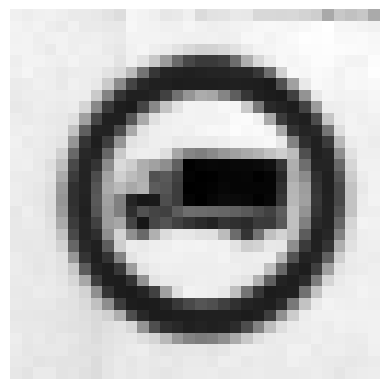

Real Label: 1, Predicted Label: 1


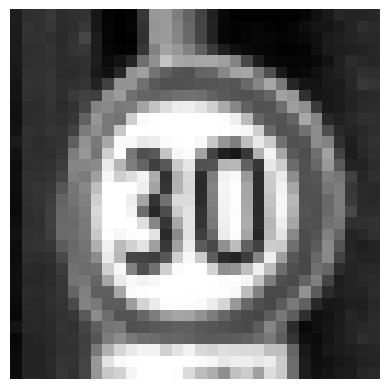

Real Label: 38, Predicted Label: 38


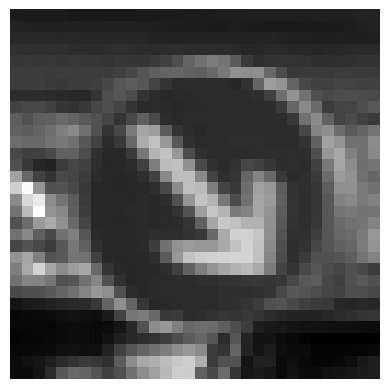

Real Label: 33, Predicted Label: 33


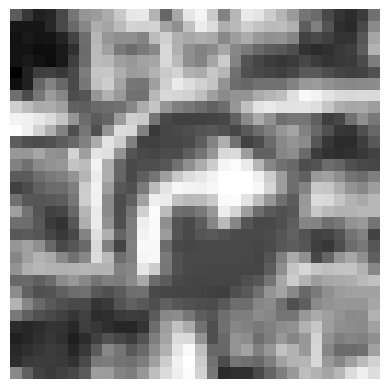

Real Label: 11, Predicted Label: 11


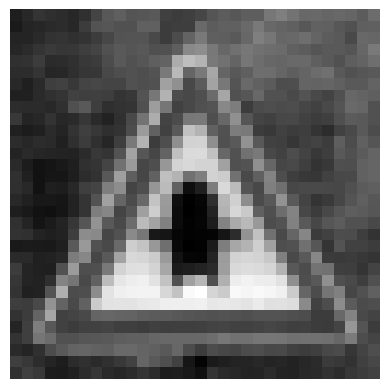

Real Label: 38, Predicted Label: 38


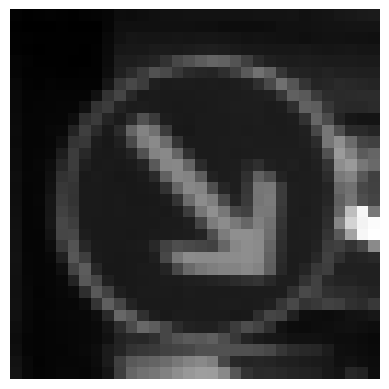

Real Label: 18, Predicted Label: 18


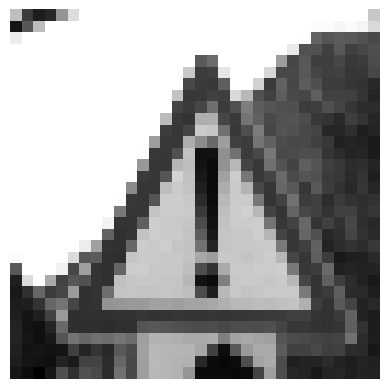

Real Label: 12, Predicted Label: 12


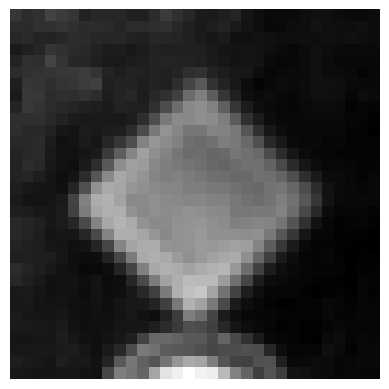

Real Label: 25, Predicted Label: 25


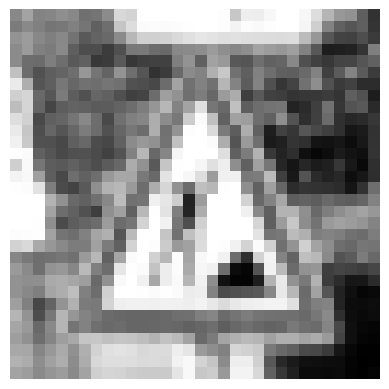

Real Label: 35, Predicted Label: 35


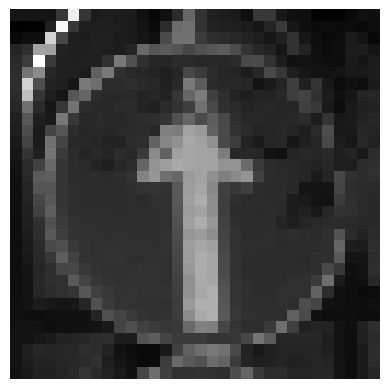

In [101]:
import numpy as np

# Predict on real test data
predictions = best_CNN_model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_labels == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on real test data: {:.2%}".format(accuracy))

# Print test images with real and predicted labels
for i in range(10):
    # Display the test image
    plt.imshow(X_test_gray_norm[i], cmap='gray')
    plt.axis('off')

    # Get the real and predicted labels
    real_label = np.argmax(y_test[i])
    predicted_label = predicted_labels[i]

    # Print the labels
    print("Real Label: {}, Predicted Label: {}".format(real_label, predicted_label))

    # Show the plot
    plt.show()